# Research & Data Analysis
This notebook was used to import / process relevant data and conduct exploratory data analysis to determine relationships and best model frameworks.

### 0. Preliminary Imports

In [158]:
# data processing packages
import pandas as pd

# data analysis packages
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import math
import sklearn
from sklearn.linear_model import LogisticRegression

# visualization packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


### 1. Data Imports & Processing

In this section, we import our data files and process them accordingly to prepare for exploratory data analysis. Note that the data files themselves were pieced together carefully from several publicly available sources including census data and FCC broadband data. This refinement was done in Excel.

In [159]:
# import refined data files
features = pd.read_csv('data/consolidated_features.csv')
hist_adoption = pd.read_csv('data/hist_bb_trends.csv', header=None)

# trim hist_adoption dataset and convert to numerics
hist_adoption.drop(columns=[x for x in range(4)], inplace=True)
hist_adoption = hist_adoption.apply(pd.to_numeric, errors='coerce')

In [166]:
# extract x and y values from data
x = hist_adoption.iloc[0].to_numpy(dtype=int)[14:]
y = hist_adoption.iloc[1].to_numpy(dtype=float)[14:]

# shift x so it starts at 0
x = x - x.min()

# logistic function for preliminary fit
def logistic_function(x, L, k, x0, y0):
    return L / (1 + np.exp(-k * np.clip(x - x0, -100, 100))) + y0

# initial guess
p = [100 - min(y), 0.2, np.median(x), min(y)]

# fit curve
p_out, _ = curve_fit(logistic_function, x, y, p0, maxfev=10000)

# extrapolate points based on fitted curve
x_fit = np.linspace(min(x), max(x)+7, 500)
y_fit = logistic_function(x_fit, *p_out)

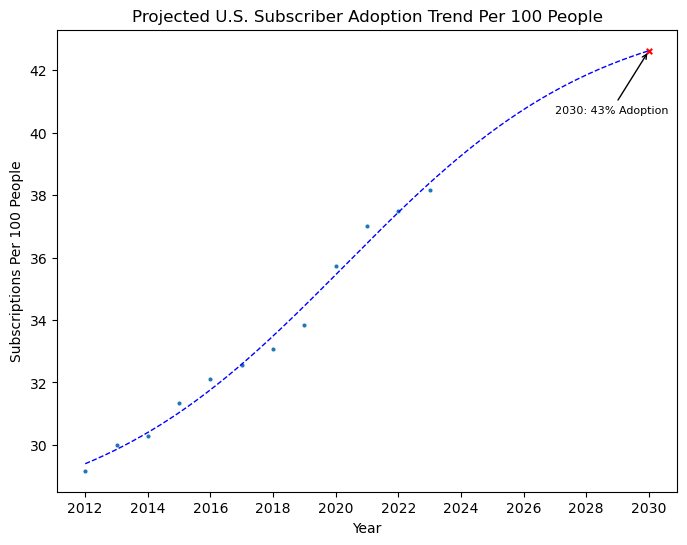

In [168]:
# plot data and projection curve
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x+2012, y, marker='.', s=15)
ax.plot(x_fit+2012, y_fit, c='blue', linestyle='--', linewidth=1)

proj = logistic_function(18, *p_out)
ax.scatter([2030], proj, color='red', marker='x', s=15)
ax.annotate(f'2030: 43% Adoption', xy=(2030, proj),xytext=(2027, proj-2),arrowprops=dict(arrowstyle="->", color='black'),fontsize=8)
plt.title('Projected U.S. Subscriber Adoption Trend Per 100 People')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.xlabel('Year')
plt.ylabel('Subscriptions Per 100 People')
plt.show()

# comment

### 3. Exploratory Data Analysis

In [ ]:
# conduct exploratory data analysis